#### 클러스터링 준비 
1. 데이터 준비
2. 얼마나 많은 클러스터가 필요한지 
3. 클러스터의 초기 중심점을 설정
4. 가장 가까운 데이터 클러스터에 할당 
5. 클러스터의 중간점에 centroid로 옮김
6. 4~5단계를 반복 , 클러스터가 더이상 변화없을때 멈춤

#### centroid 초기화하는 방법
1. 랜텀 초이스
2. 수동으로 선택 
3. k-mean++방법 

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

C:\Users\sjsim\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\sjsim\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\sjsim\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df=pd.DataFrame(columns=['x','y'])

In [4]:
df.loc[0]=[3,1]
df.loc[1]=[4,1]
df.loc[2]=[3,2]
df.loc[3]=[4,1]
df.loc[4]=[10,5]
df.loc[5]=[10,6]
df.loc[6]=[11,5]
df.loc[7]=[11,6]
df.loc[8]=[15,1]
df.loc[9]=[15,2]
df.loc[10]=[16,1]
df.loc[11]=[16,2]

In [5]:
df

,x,y
0,3,1
1,4,1
2,3,2
3,4,1
4,10,5
5,10,6
6,11,5
7,11,6
8,15,1
9,15,2


Text(16.299999999999997, 0.5, 'y')

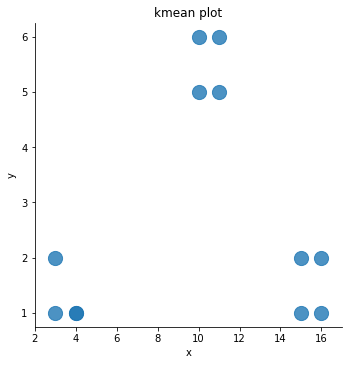

In [10]:
sb.lmplot('x','y',data=df , fit_reg=False,scatter_kws={'s':200})
plt.title('kmean plot')
plt.xlabel('x')
plt.ylabel('y')

In [13]:
data_points=df.values

In [14]:
# 초기 중심을 안주면 k-mean++ 방법
kmeans= KMeans(n_clusters=3).fit(data_points)

In [15]:
kmeans.labels_

array([0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [16]:
kmeans.cluster_centers_

array([[ 3.5 ,  1.25],
       [15.5 ,  1.5 ],
       [10.5 ,  5.5 ]])

In [17]:
df['id']=kmeans.labels_

In [19]:
df.head()

,x,y,id
0,3,1,0
1,4,1,0
2,3,2,0
3,4,1,0
4,10,5,2


Text(0.5, 1.0, 'after Kmeans plot')

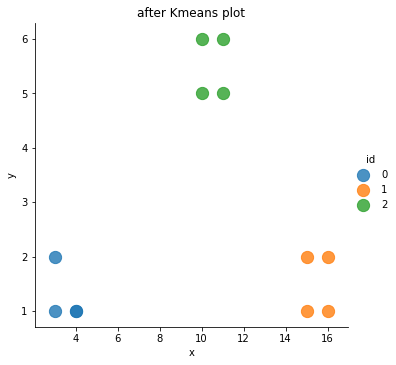

In [21]:
sb.lmplot('x','y',data=df , fit_reg=False,scatter_kws={'s':150},hue='id')
plt.title('after Kmeans plot')